<a href="https://colab.research.google.com/github/Hrithik2212/PyTorch-Deep-Learning-/blob/main/03_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Computer Vision

### Base Computer Vision Libraries 
* TorchVision 
* TorchVision.datasets
* TorchVision.model
* TorchVision.transforms
* Torch.util.data.Dataset
* Torch.util.dataloader.Dataset

In [1]:
!nvidia-smi

Mon Aug  8 11:42:14 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import torch
from torch import nn
import torchvision 
from torchvision import transforms
from torchvision import datasets
import matplotlib.pyplot as plt 

print(f"Torch Version {torch.__version__} | TorchVision Version {torchvision.__version__}")


Torch Version 1.12.0+cu113 | TorchVision Version 0.13.0+cu113


In [3]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cuda'

## Data Wrangling 

In [5]:
train_data = datasets.FashionMNIST(root ='data',
                                   train=True,
                                   download=True,
                                   transform = torchvision.transforms.ToTensor(),
                                   target_transform = None)
test_data = datasets.FashionMNIST(root ='data',
                                   train=False,
                                   download=True,
                                   transform = torchvision.transforms.ToTensor(),
                                   target_transform = None)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [6]:
len(train_data) , len(test_data)

(60000, 10000)

In [7]:
class_names = train_data.classes 
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
train_classes = train_data.class_to_idx
train_classes

{'Ankle boot': 9,
 'Bag': 8,
 'Coat': 4,
 'Dress': 3,
 'Pullover': 2,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'T-shirt/top': 0,
 'Trouser': 1}

## Visualizing of Data 

Image Shape : torch.Size([1, 28, 28])
Class : Ankle boot 


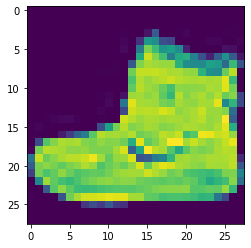

In [9]:
img , label = train_data[0]
print(f"Image Shape : {img.shape}")
plt.imshow(img.squeeze())
print(f"Class : {class_names[label]} ")

Text(0.5, 1.0, 'Ankle boot')

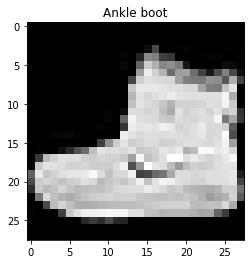

In [10]:
plt.imshow(img.squeeze() , cmap = 'gray')
plt.title(class_names[label])

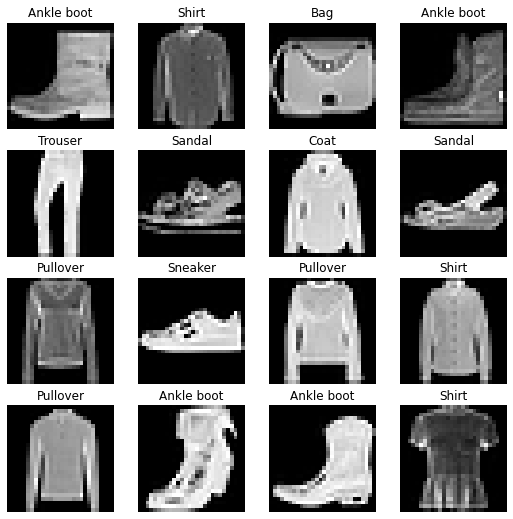

In [11]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False);

## Prepare Data Loader 

In [12]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32 
# Turning data into Iterables 
train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True)
test_dataloader = DataLoader(dataset = test_data,
                             batch_size = BATCH_SIZE,
                             shuffle = False )

In [13]:
print(f"Length of Train Data Loader {len(train_dataloader)} of bathces of {BATCH_SIZE}")
print(f"Length of Test Data Loader {len(test_dataloader)} of bathces {BATCH_SIZE}")

Length of Train Data Loader 1875 of bathces of 32
Length of Test Data Loader 313 of bathces 32


## Model Building 

### Model 0 : ANN 

In [18]:
class FashionMNISTModelV0(nn.Module):
  def __init__(self ,input:int , hidden_dim:int , output:int ):
    super().__init__()
    self.layer_stack = nn.Sequential(
                                    nn.Flatten(),
                                    nn.Linear(in_features = input      , out_features = hidden_dim),
                                    nn.ReLU(), 
                                    nn.Linear(in_features = hidden_dim , out_features = output   )
                                    )

  def forward(self,x):
    return self.layer_stack(x)

Model_0 = FashionMNISTModelV0(input = 28*28 , hidden_dim = 10 ,output = 10).to(device)
Model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [19]:
Model_0.parameters

<bound method Module.parameters of FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)>

In [20]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params =Model_0.parameters() , lr = 0.1)

In [21]:
torch.cuda.manual_seed(42)
epochs = 3

for epoch in range(epochs):
  train_loss = 0 
  print(f"Epoch {epoch} |")
  for batch , (X,y) in enumerate(train_dataloader):
    Model_0.train()
    X = X.to(device)
    y = y.to(device)
    # 1 Forward pass 
    y_pred = Model_0(X)
    # 2 Calculate loss 
    loss = loss_fn(y_pred,y)
    train_loss += loss
    # 3 Optimizer Zero Grad 
    optimizer.zero_grad()
    # Backward Pass
    loss.backward()
    # Optimizer Step 
    optimizer.step()
    if not batch%400 :
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  train_loss /= len(train_dataloader)
  test_loss, test_acc = 0, 0 
  Model_0.eval()
  with torch.inference_mode():
        for X, y in test_dataloader:
            X = X.to(device)
            y = y.to(device)
          
            # 1. Forward pass
            test_pred = Model_0(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch 0 |
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.64940 | Test loss: 0.55345, Test acc: 80.36%

Epoch 1 |
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.50363 | Test loss: 0.49738, Test acc: 82.18%

Epoch 2 |
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.47053 | Test loss: 0.49001, Test acc: 83.07%



### Model 1 : CNN with SGD

In [30]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self , input_dim , hidden_dim , output_dim):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
                                nn.Conv2d(in_channels=input_dim, out_channels=hidden_dim , 
                                          kernel_size = 3, stride = 1, padding = 1),
                                nn.ReLU(),
                                nn.Conv2d(in_channels=hidden_dim, out_channels = hidden_dim,
                                          kernel_size  =3 , stride = 1 , padding =1  ),
                                nn.ReLU(),
                                nn.MaxPool2d(2)     
                                     )
    self.conv_block_2 = nn.Sequential(
                                  nn.Conv2d(in_channels=hidden_dim , out_channels = hidden_dim,
                                            kernel_size = 3,padding=1),
                                  nn.ReLU(),
                                  nn.Conv2d(in_channels=hidden_dim , out_channels = hidden_dim,
                                            kernel_size = 3,padding=1),
                                  nn.ReLU(),
                                  nn.MaxPool2d(2)
                                     )
    self.dense_block = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=hidden_dim*7*7,out_features =output_dim))
    
  def forward(self,X):
    return self.dense_block(self.conv_block_2(self.conv_block_1(X)))

In [32]:
torch.cuda.manual_seed(42)
Model_1 = FashionMNISTModelV1(input_dim=1,hidden_dim = 10 , output_dim = len(class_names)).to(device)
Model_1

FashionMNISTModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [34]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params =Model_1.parameters() , lr = 0.1)

In [35]:
torch.cuda.manual_seed(42)
epochs = 10

for epoch in range(epochs):
  train_loss = 0 
  print(f"Epoch {epoch} |")
  for batch , (X,y) in enumerate(train_dataloader):
    Model_1.train()
    X = X.to(device)
    y = y.to(device)
    # 1 Forward pass 
    y_pred = Model_1(X)
    # 2 Calculate loss 
    loss = loss_fn(y_pred,y)
    train_loss += loss
    # 3 Optimizer Zero Grad 
    optimizer.zero_grad()
    # Backward Pass
    loss.backward()
    # Optimizer Step 
    optimizer.step()
    if not batch%400 :
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

  train_loss /= len(train_dataloader)
  test_loss, test_acc = 0, 0 
  Model_1.eval()
  with torch.inference_mode():
        for X, y in test_dataloader:
            X = X.to(device)
            y = y.to(device)
          
            # 1. Forward pass
            test_pred = Model_1(X)
           
            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))
        
        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)
  print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

Epoch 0 |
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.56788 | Test loss: 0.42434, Test acc: 84.43%

Epoch 1 |
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.36145 | Test loss: 0.37215, Test acc: 86.97%

Epoch 2 |
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.32550 | Test loss: 0.32697, Test acc: 87.86%

Epoch 3 |
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked at 51200/60000 samples

Train loss: 0.30508 | Test loss: 0.33043, Test acc: 87.82%

Epoch 4 |
Looked at 0/60000 samples
Looked at 12800/60000 samples
Looked at 25600/60000 samples
Looked at 38400/60000 samples
Looked

### Model 2 : CNN with Adam 

In [36]:
Model_2 = FashionMNISTModelV1(input_dim=1,hidden_dim=10,output_dim=len(train_classes)).to(device)
Model_2

FashionMNISTModelV1(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (dense_block): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [37]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(Model_2.parameters(),lr=0.1)

In [ ]:
torch.cuda.manual_seed(42)
epochs = 10 

for epoch in range(epochs):
  print(f"Epoch {epoch+1}")
  ''' Train Loop '''
  for batch ,(X,y) in enumerate(train_dataloader):
    Model_2.train()
    X , y = X.to(device) ,y.to(device)
    # Forward Pass 
    y_pred = Model_2(X)
    # Calculate Loss and accuracy 
    loss = loss_fn(y_pred , y)
    acc = accuracy_fn(y , y_pred.argmax(dim=1))
    # Optimizer Zero grad
    optimizer.zero_grad()
    # Backward Pass
    loss.backward()
    # Optimizer Step
    optimizer.step()
    if not batch%400 :
      print(f'Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples')

    train_loss /= len(train_dataloader)
    test_loss, test_acc = 0, 0   

